In [1]:
import math
import os

import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sb
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
data_dir = "./data"

In [3]:
data = pd.read_json(os.path.join(data_dir, "dessert.json"))

## Data inspection

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            392 non-null    int64 
 1   description   392 non-null    object
 2   tags          392 non-null    object
 3   manufacturer  254 non-null    object
 4   type          390 non-null    object
 5   portions      392 non-null    object
 6   nutrients     392 non-null    object
dtypes: int64(1), object(6)
memory usage: 21.6+ KB


In [5]:
data.isnull().sum()

id                0
description       0
tags              0
manufacturer    138
type              2
portions          0
nutrients         0
dtype: int64

In [6]:
data.shape

(392, 7)

In [7]:
data.columns

Index(['id', 'description', 'tags', 'manufacturer', 'type', 'portions',
       'nutrients'],
      dtype='object')

In [8]:
data.head()

,id,description,tags,manufacturer,type,portions,nutrients
0,18011,"Biscuits, plain or buttermilk, dry mix, prepared",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
1,18012,"Biscuits, plain or buttermilk, refrigerated do...",[],,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
2,18013,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
3,18014,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
4,18015,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


In [9]:
# set index because there is already a valid id
data = data.set_index("id")
data.head()

,description,tags,manufacturer,type,portions,nutrients
id,,,,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
18012,"Biscuits, plain or buttermilk, refrigerated do...",[],,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
18013,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
18014,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
18015,"Biscuits, plain or buttermilk, refrigerated do...",[],None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


## Exercise 1

### 1 a)

In [10]:
# Check for empty values in the manufacturer column
(data["manufacturer"] == "").sum()

173

In [11]:
# Transform empty type values of manufacturer to None
data.loc[data.manufacturer == "", "manufacturer"] = None
(data["manufacturer"] == "").sum()

0

In [12]:
# Check values in the type column
data.type.value_counts()

Cake                108
Cookies              86
Sweet Bread          61
Savory Bread         41
Toaster Pastries     25
Biscuits             24
Muffins              17
Sweet bread           9
Puff Pastry           5
Sweet Breads          3
Cream Puff            3
Coookies              2
Biscuit               1
Muesli                1
Savory bread          1
Muffin                1
sweet bread           1
Cookie                1
Name: type, dtype: int64

In [13]:
# transform troublesome type values
data.loc[data.type.isin(["Coookies", "Cookie"]), "type"] = "Cookies"
data.loc[
    data.type.isin(["Sweet bread", "sweet bread", "Sweet Breads"]), "type"
] = "Sweet Bread"
data.loc[data.type == "Savory bread", "type"] = "Savory Bread"
data.loc[data.type == "Biscuit", "type"] = "Biscuits"
data.loc[data.type == "Muffin", "type"] = "Muffins"

In [14]:
data.type.value_counts()

Cake                108
Cookies              89
Sweet Bread          74
Savory Bread         42
Biscuits             25
Toaster Pastries     25
Muffins              18
Puff Pastry           5
Cream Puff            3
Muesli                1
Name: type, dtype: int64

In [15]:
# Check values in the tags column
data.tags.value_counts()

[]                               388
[Latino food]                      2
[Include commodity code B367]      1
[Include commodity code B368]      1
Name: tags, dtype: int64

In [16]:
# drop the column "tags" because because it contains too little information (just 4 entries)
data = data.drop("tags", axis=1)
data.head()

,description,manufacturer,type,portions,nutrients
id,,,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 7.3, 'units': 'g', 'description': '..."
18012,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.7, 'units': 'g', 'description': '..."
18013,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.8, 'units': 'g', 'description': '..."
18014,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 6.66, 'units': 'g', 'description': ..."
18015,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 7.38, 'units': 'g', 'description': ..."


Check for problems in data

In [17]:
for value in data.index:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [18]:
for value in data["description"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [19]:
for value in data["type"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

None: Missing
None: Missing


In [20]:
# look at data with type None
data.loc[data["type"].isnull()]

,description,manufacturer,type,portions,nutrients
id,,,,,
18048,Raisin bread (toasted),None,None,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 8.6, 'units': 'g', 'description': '..."
18642,"GENERAL MILLS, BETTY CROCKER SUPERMOIST Yellow...",General Mills Inc.,None,"[{'amount': 1, 'unit': 'serving', 'grams': 43.0}]","[{'value': 3.8, 'units': 'g', 'description': '..."


In [21]:
print(data.at[18048, "description"])

Raisin bread (toasted)


In [22]:
print(data.at[18642, "description"])

GENERAL MILLS, BETTY CROCKER SUPERMOIST Yellow Cake Mix, dry


In [23]:
# Set missing type for empty type values
data.at[18048, "type"] = "Sweet Bread"
data.at[18642, "type"] = "Cake"

In [24]:
# Look for empty values in nutrients
for value in data["nutrients"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

In [25]:
# Look for empty values in portions

for value in data["portions"]:
    if value is None:
        print(f"{value}: Missing")
    elif isinstance(value, float) and math.isnan(value):
        print(f"{value}: Not a Number")
    elif not value:
        print(
            f"{value}: Empty value ({repr(value)})"
        )  # return representable string

[]: Empty value ([])
[]: Empty value ([])
[]: Empty value ([])
[]: Empty value ([])


In [26]:
# Remove empty values of portions
for value in data["portions"]:
    if not value:
        data.drop(data["portions"][value], inplace=True)

In [27]:
# We parse the portions column and create a separate DataFrame for it, since it contains nested data
# We also store the id of the associated row, so as not to lose the information to which the portions were related to
portions_list = []
portions_row = []
data_id = data.index[0]

# Loop through the portions column and create one portions_row for each list in each row of data
for array in data["portions"].values:
    for list_of_portions in array:
        portions_row = []
        portions_row.append(data_id)
        for key in list_of_portions:
            portions_row.append(list_of_portions[key])

        portions_list.append(portions_row)

    data_id = data_id + 1

# Create the DataFrame from the list
portions = pd.DataFrame(
    portions_list, columns=["id", "amount", "unit", "grams"]
)
portions

,id,amount,unit,grams
0,18011,1,oz,28.35
1,18012,1,oz,28.35
2,18012,2,biscuit (2 dia),23.00
3,18013,1,oz,28.35
4,18013,2,biscuit (2-1/4 dia),21.00
...,...,...,...,...
748,18400,1,waffles round,70.00
749,18401,1,serving (approximate serving size),55.00
750,18401,2,cake square (average weight of whole item),399.00
751,18402,1,serving,55.00


In [28]:
# We also parse the nutrients column in the same way we did the portions column
nutrients_list = []
nutrients_row = []
data_id = data.index[0]

for array in data["nutrients"].values:
    for list_of_portions in array:
        nutrients_row = []
        nutrients_row.append(data_id)
        for key in list_of_portions:
            nutrients_row.append(list_of_portions[key])

        nutrients_list.append(nutrients_row)

    data_id = data_id + 1

nutrients = pd.DataFrame(
    nutrients_list, columns=["id", "value", "units", "description", "type"]
)
nutrients

,id,value,units,description,type
0,18011,7.300,g,Protein,Composition
1,18011,12.100,g,Total lipid (fat),Composition
2,18011,48.400,g,"Carbohydrate, by difference",Composition
3,18011,3.300,g,Ash,Other
4,18011,335.000,kcal,Energy,Energy
...,...,...,...,...,...
21545,18402,4.411,g,"Fatty acids, total monounsaturated",Other
21546,18402,9.424,g,"Fatty acids, total polyunsaturated",Other
21547,18402,0.082,g,"Fatty acids, total trans-monoenoic",Other
21548,18402,0.078,g,"Fatty acids, total trans-polyenoic",Other


In [29]:
# Drop the portions and nutrients columns from data, as now there are separate DataFrames for them
data = data.drop("portions", axis=1)
data = data.drop("nutrients", axis=1)
data.head()

,description,manufacturer,type
id,,,
18011,"Biscuits, plain or buttermilk, dry mix, prepared",None,Biscuits
18012,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits
18013,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits
18014,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits
18015,"Biscuits, plain or buttermilk, refrigerated do...",None,Biscuits


In [30]:
data.sample(20, random_state=1)

,description,manufacturer,type
id,,,
18133,"Cake, sponge, commercially prepared",None,Cake
18258,"English muffins, plain, enriched, with ca prop...",None,Savory Bread
18563,"ARCHWAY Home Style Cookies, Gourmet Rocky Road",Archway Cookies,Cookies
18188,"Cookies, peanut butter, refrigerated dough, baked",None,Cookies
18938,"Toaster Pastries, fruit, frosted (include appl...",None,Toaster Pastries
18363,"Tortillas, ready-to-bake or -fry, corn",None,Savory Bread
18127,"Cake, snack cakes, creme-filled, chocolate wit...",None,Cake
18148,"Cheesecake prepared from mix, no-bake type",None,Cake
18131,"Cake, white, dry mix, special dietary (include...",None,Cake


### 1 b)

In [31]:
# General distribution of types of desserts
data.type.value_counts()

Cake                109
Cookies              89
Sweet Bread          75
Savory Bread         42
Biscuits             25
Toaster Pastries     25
Muffins              18
Puff Pastry           5
Cream Puff            3
Muesli                1
Name: type, dtype: int64

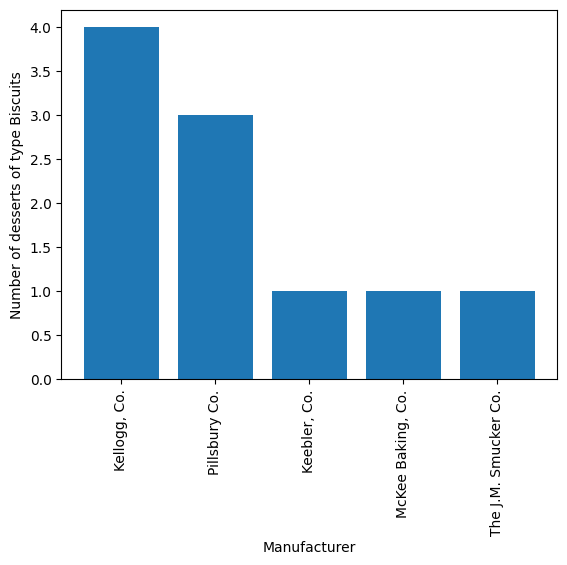

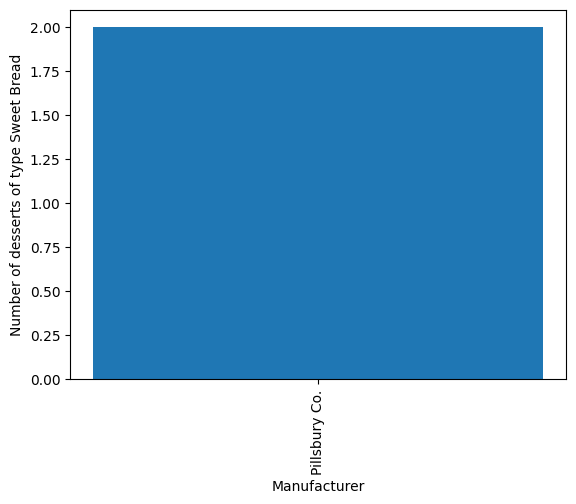

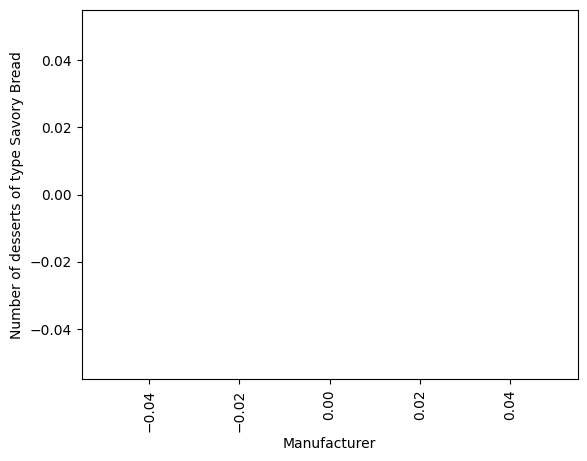

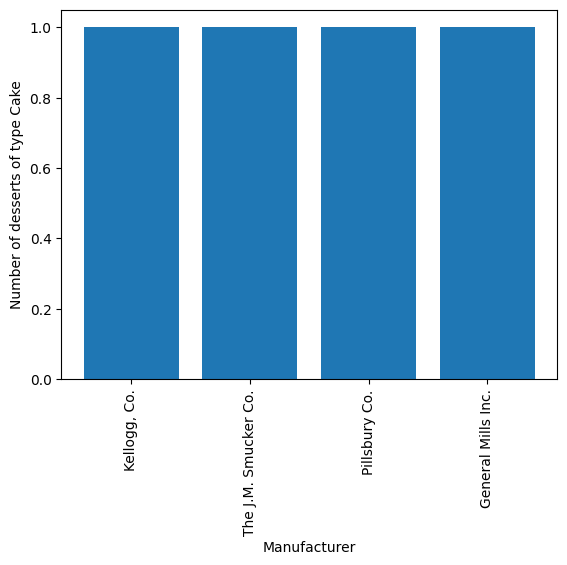

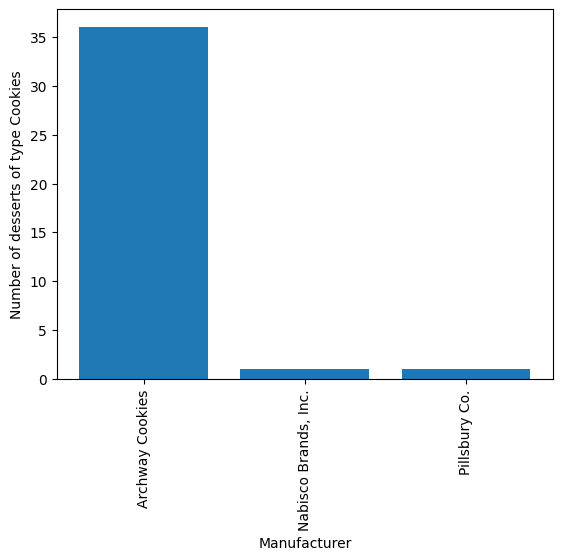

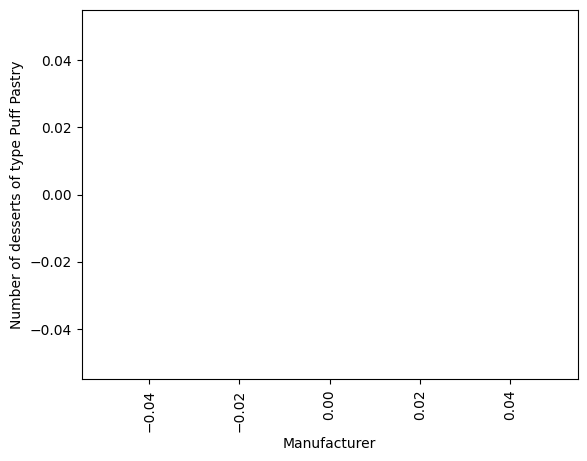

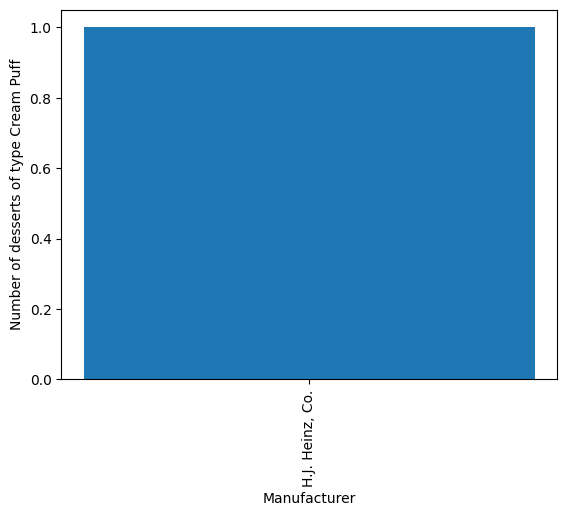

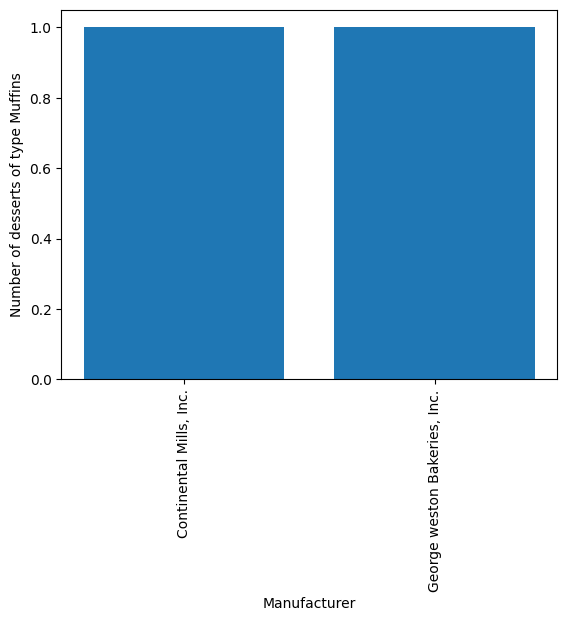

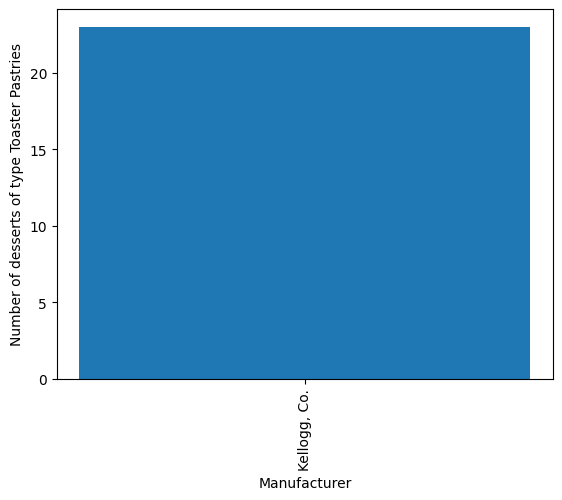

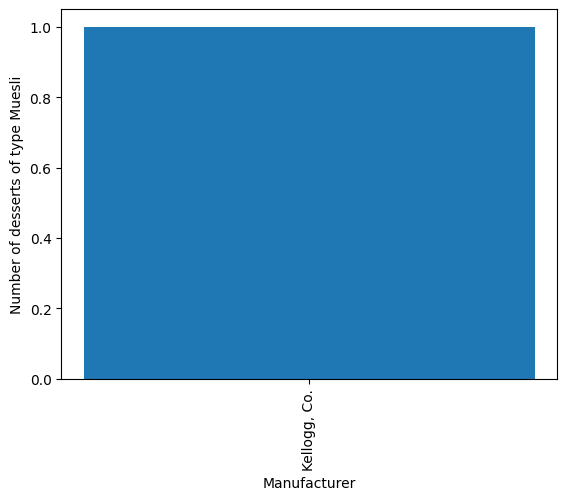

In [32]:
# Plotting how many desserts of each type are produced by each manufacturer, excluding the data where the manufacturer is not known (=None))
# If some/all manufacturers are missing in a plot of one dessert, it means that those manufacturers do not make that product (thus some plots may be empty)
for type_of_dessert in data.type.unique():
    dessert_distribution = data[
        data["type"] == type_of_dessert
    ].manufacturer.value_counts()

    plt.bar(dessert_distribution.index, dessert_distribution.values)
    plt.xlabel("Manufacturer")
    plt.ylabel("Number of desserts of type " + type_of_dessert)
    plt.xticks(rotation=90)
    plt.show()

### 1 c)

In [33]:
nutrients.describe()

,id,value
count,21550.000000,21542.000000
mean,18182.851090,73.234701
std,106.546397,919.628462
min,18011.000000,-88.000000
25%,18092.000000,0.167000
50%,18177.000000,0.800000
75%,18262.000000,15.000000
max,18402.000000,124300.000000


In [34]:
# extract just the vitamins from the nutrients
vitamins = nutrients[nutrients["type"] == "Vitamins"]
vitamins

,id,value,units,description,type
18,18011,999.00,IU,"Vitamin A, IU",Vitamins
19,18011,25.00,mcg,Retinol,Vitamins
20,18011,26.00,mcg_RAE,"Vitamin A, RAE",Vitamins
21,18011,0.40,mg,"Vitamin C, total ascorbic acid",Vitamins
22,18011,0.35,mg,Thiamin,Vitamins
...,...,...,...,...,...
21538,18402,0.07,mg,Thiamin,Vitamins
21539,18402,0.18,mg,Riboflavin,Vitamins
21540,18402,4.70,mg,Niacin,Vitamins
21541,18402,0.55,mg,Pantothenic acid,Vitamins


In [35]:
vitamins.units.value_counts()

mcg        3082
mg         2800
IU          538
mcg_RAE     316
mcg_DFE     308
Name: units, dtype: int64

In [36]:
# convert mcg to mg
vitamins.loc[vitamins.units == "mcg", "value"] = vitamins.value * 0.001
vitamins.loc[vitamins.units == "mcg", "units"] = "mg"
vitamins.units.value_counts()

mg         5882
IU          538
mcg_RAE     316
mcg_DFE     308
Name: units, dtype: int64

In [37]:
total_units = len(vitamins)
mg_units = (vitamins["units"] == "mg").sum()
non_mg_units = (vitamins["units"] != "mg").sum()
display(total_units)
display(mg_units)
display(non_mg_units)

display(mg_units * 100 / total_units)

7044

5882

1162

83.50369108461102

Since the conversions from IU, mcg_RAE and mcg_DFE to mg are complicated, and the majority of the data is provided in mg (83%) we just consider mg and drop the other units.

In [38]:
vitamins = vitamins.loc[vitamins["units"] == "mg"]
vitamins

,id,value,units,description,type
19,18011,0.025,mg,Retinol,Vitamins
21,18011,0.400,mg,"Vitamin C, total ascorbic acid",Vitamins
22,18011,0.350,mg,Thiamin,Vitamins
23,18011,0.357,mg,Riboflavin,Vitamins
24,18011,3.021,mg,Niacin,Vitamins
...,...,...,...,...,...
21538,18402,0.070,mg,Thiamin,Vitamins
21539,18402,0.180,mg,Riboflavin,Vitamins
21540,18402,4.700,mg,Niacin,Vitamins
21541,18402,0.550,mg,Pantothenic acid,Vitamins


In [39]:
# do a list with ids grouped by dessert types
dessert_types = []
ids = []
for dessert_type in data.type.unique():
    dessert_types.append(dessert_type)

for dessert_type in data.type.unique():
    id_types = []
    for row in data.index:
        if data.loc[data.index == row, "type"].values[0] == dessert_type:
            id_types.append(row)

    ids.append(id_types)

print(ids)

[[18011, 18012, 18013, 18014, 18015, 18016, 18017, 18365, 18367, 18403, 18505, 18506, 18507, 18512, 18609, 18612, 18615, 18629, 18633, 18634, 18932, 18933, 18934, 18935, 18951], [18019, 18021, 18027, 18028, 18029, 18030, 18032, 18035, 18036, 18037, 18038, 18039, 18040, 18041, 18042, 18043, 18045, 18047, 18048, 18049, 18050, 18051, 18055, 18057, 18059, 18061, 18064, 18065, 18068, 18071, 18073, 18075, 18077, 18078, 18079, 18081, 18082, 18084, 18085, 18240, 18250, 18253, 18254, 18256, 18268, 18269, 18270, 18271, 18272, 18339, 18344, 18345, 18346, 18347, 18349, 18350, 18351, 18352, 18353, 18355, 18357, 18358, 18361, 18362, 18383, 18384, 18385, 18412, 18413, 18414, 18432, 18436, 18447, 18631, 18635], [18022, 18023, 18024, 18033, 18066, 18217, 18218, 18219, 18221, 18222, 18223, 18224, 18225, 18227, 18229, 18230, 18231, 18232, 18233, 18234, 18236, 18241, 18258, 18259, 18260, 18261, 18262, 18263, 18264, 18265, 18266, 18267, 18360, 18363, 18376, 18396, 18400, 18426, 18428, 18434, 18457, 18953],

In [40]:
# vitamins for type bisquits
index_list = ids[0]
vitamins_bisq = vitamins.loc[vitamins["id"].isin(index_list)]
values2 = vitamins_bisq["id"].value_counts()
print(values2)

18012    23
18013    23
18015    22
18014    20
18011    11
18017    11
18016    10
Name: id, dtype: int64


In [41]:
# calculate the median of vitamins for every dessert type
medians = []
for type in range(len(ids)):
    index_list = ids[type]
    vitamins_per_type = vitamins.loc[vitamins["id"].isin(index_list)]
    values = vitamins_per_type["id"].value_counts()
    medians.append(values.median())

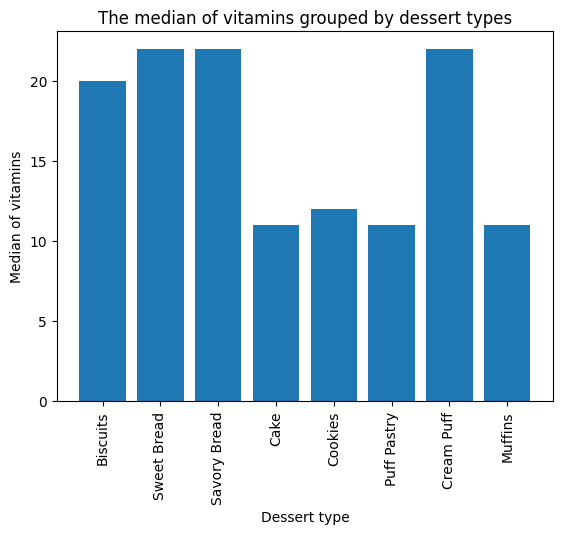

In [42]:
# plot the medians, Toaster Pastries and Muesli does not have any specified vitamins
plt.bar(data.type.unique(), medians)
plt.xlabel("Dessert type")
plt.ylabel("Median of vitamins")
plt.title("The median of vitamins grouped by dessert types")
plt.xticks(rotation=90)
plt.show()

In [43]:
pd.DataFrame([vitamins.min(), vitamins.max()])

,id,value,units,description,type
0,18011,-0.088,mg,Betaine,Vitamins
1,18402,226.700,mg,Vitamin K (phylloquinone),Vitamins


In [44]:
vitamins["value"].describe()

count    5877.000000
mean        1.058705
std         5.794729
min        -0.088000
25%         0.000000
50%         0.035700
75%         0.266000
max       226.700000
Name: value, dtype: float64

In [45]:
vitamins["value"][vitamins["value"] >= 0].describe()

count    5876.000000
mean        1.058900
std         5.795203
min         0.000000
25%         0.000000
50%         0.035850
75%         0.266000
max       226.700000
Name: value, dtype: float64

In [46]:
# There is only one negative value, we can just remove it
vitamins = vitamins.loc[vitamins["value"] >= 0]
vitamins["value"].describe()

count    5876.000000
mean        1.058900
std         5.795203
min         0.000000
25%         0.000000
50%         0.035850
75%         0.266000
max       226.700000
Name: value, dtype: float64

In [47]:
# Check for null values in vitamins
display(vitamins["value"].isnull().sum())

0

## 1d)

Test for normal distribution

Text(0.5, 1.0, 'Fit Values: 1.06 (mean) and 5.79 (std)')

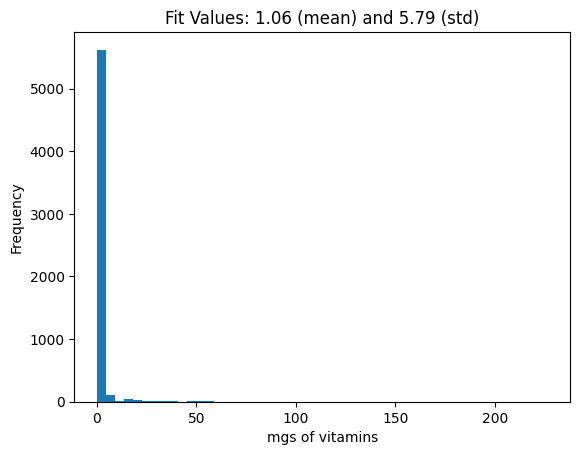

In [48]:
mean, std = norm.fit(vitamins["value"])
plt.hist(vitamins["value"], bins=50)
title = "Fit Values: {:.2f} (mean) and {:.2f} (std)".format(mean, std)
plt.xlabel("mgs of vitamins")
plt.ylabel("Frequency")
plt.title(title)

<AxesSubplot: >

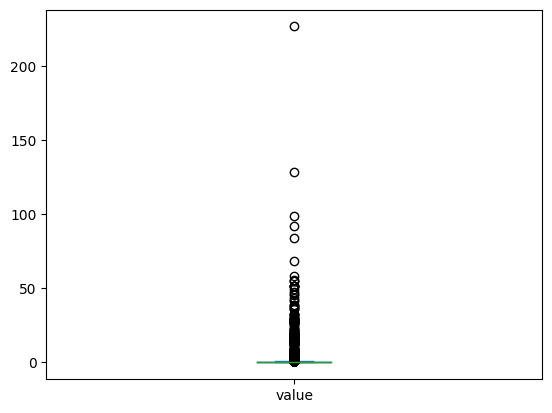

In [49]:
vitamins["value"].plot(kind="box")

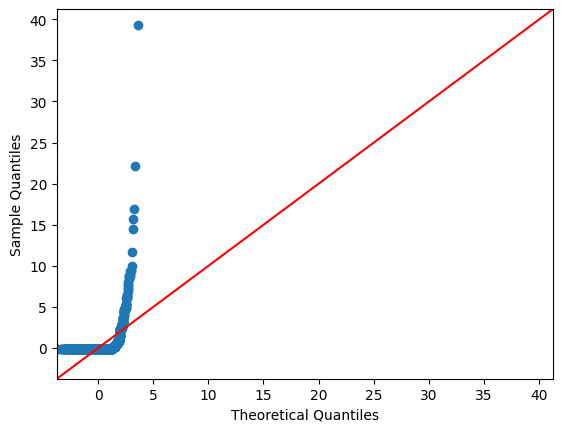

In [50]:
sm.qqplot(
    vitamins["value"].astype("int", errors="ignore"), line="45", fit=True
);

These tests show that the distribution does not follow a normal distribution, hence, methods like z-scores for outlier detection would not give best results, but we try applying it anyways.

In [51]:
# compute z-scores for value
zscore = (vitamins["value"] - vitamins["value"].mean()) / vitamins[
    "value"
].std()
vitamins[f"zscore_value"] = zscore

In [52]:
# check new structure of dataframe
vitamins.columns

Index(['id', 'value', 'units', 'description', 'type', 'zscore_value'], dtype='object')

In [53]:
# which columns feature outliers w.r.t. value?
vitamins[vitamins.zscore_value.abs() > 3]

,id,value,units,description,type,zscore_value
95,18012,19.2,mg,"Choline, total",Vitamins,3.130365
100,18012,41.8,mg,Betaine,Vitamins,7.030142
167,18013,19.8,mg,"Choline, total",Vitamins,3.233899
172,18013,45.4,mg,Betaine,Vitamins,7.651346
306,18015,19.8,mg,"Choline, total",Vitamins,3.233899
...,...,...,...,...,...,...
20733,18389,28.1,mg,"Choline, total",Vitamins,4.666118
20903,18392,51.7,mg,"Choline, total",Vitamins,8.738452
20984,18393,38.8,mg,Betaine,Vitamins,6.512473
21036,18394,21.3,mg,Betaine,Vitamins,3.492734


To get some intution about how many outliers to expect, we use the 68-99-99.5 rule.

In [54]:
# total observations
len(vitamins)

5876

In [55]:
# 68-95-99.7 rule -> we'd expect 21 observations beyond 3*std
len(vitamins) * 0.003

17.628

In [56]:
# Look at number of outliers.
print(f"Outliers value: {(vitamins.zscore_value.abs() > 3).sum()}")

Outliers value: 84


In [57]:
outlier_condition = vitamins.zscore_value.abs() > 4
vitamins[outlier_condition]

,id,value,units,description,type,zscore_value
100,18012,41.8,mg,Betaine,Vitamins,7.030142
172,18013,45.4,mg,Betaine,Vitamins,7.651346
790,18023,84.0,mg,"Choline, total",Vitamins,14.312027
861,18024,91.9,mg,"Choline, total",Vitamins,15.675224
937,18025,55.1,mg,Betaine,Vitamins,9.325144
1008,18026,58.6,mg,Betaine,Vitamins,9.929092
1208,18029,26.5,mg,"Choline, total",Vitamins,4.390028
1287,18030,28.8,mg,"Choline, total",Vitamins,4.786908
1708,18036,26.5,mg,"Choline, total",Vitamins,4.390028
2921,18054,26.5,mg,"Choline, total",Vitamins,4.390028


Given this z-score analysis, we can remove these outliers from the dataset. Note that these aren't necessarily actual outliers, especially because the
data was not actually normally distributed.

In [58]:
vitamins.drop(vitamins[outlier_condition].index, inplace=True)
vitamins

,id,value,units,description,type,zscore_value
19,18011,0.025,mg,Retinol,Vitamins,-0.178406
21,18011,0.400,mg,"Vitamin C, total ascorbic acid",Vitamins,-0.113697
22,18011,0.350,mg,Thiamin,Vitamins,-0.122325
23,18011,0.357,mg,Riboflavin,Vitamins,-0.121117
24,18011,3.021,mg,Niacin,Vitamins,0.338573
...,...,...,...,...,...,...
21538,18402,0.070,mg,Thiamin,Vitamins,-0.170641
21539,18402,0.180,mg,Riboflavin,Vitamins,-0.151660
21540,18402,4.700,mg,Niacin,Vitamins,0.628296
21541,18402,0.550,mg,Pantothenic acid,Vitamins,-0.087814


By remaking the plots we can see a small, but not great improvement

Text(0.5, 1.0, 'Fit Values: 0.62 (mean) and 2.21 (std)')

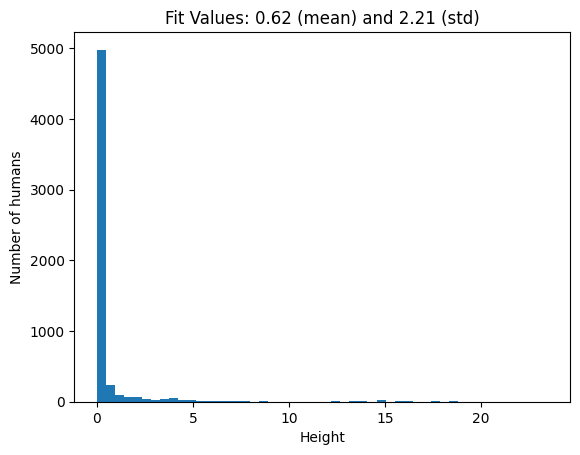

In [59]:
mean, std = norm.fit(vitamins["value"])
plt.hist(vitamins["value"], bins=50)
title = "Fit Values: {:.2f} (mean) and {:.2f} (std)".format(mean, std)
plt.xlabel("mgs of vitamins")
plt.ylabel("Frequency")
plt.title(title)

<AxesSubplot: >

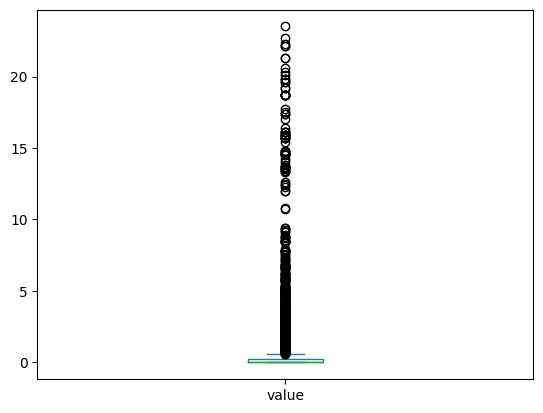

In [60]:
vitamins["value"].plot(kind="box")

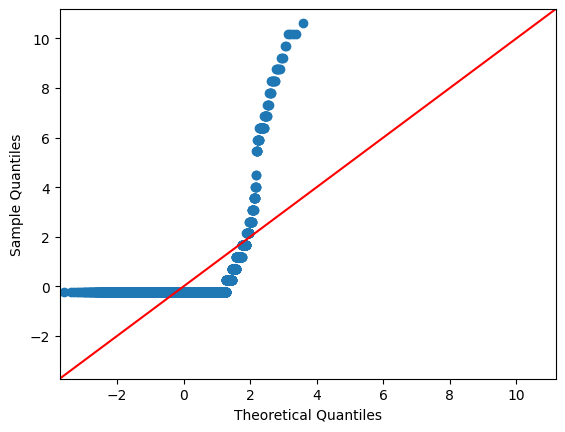

In [61]:
sm.qqplot(
    vitamins["value"].astype("int", errors="ignore"), line="45", fit=True
);

In [62]:
# There are a lot of zeros, which shouldn't represent outliers or be substitued with NaNs, because it is assumed
# that they correspond to a corrent value of a vitamin in a certain product
vitamins["value"].value_counts()

0.000    1680
0.001      79
0.100      62
0.300      52
0.003      48
         ... 
9.300       1
0.224       1
0.169       1
0.257       1
3.790       1
Name: value, Length: 1157, dtype: int64

The z-score method was used, although the data did not follow a normal distribution, and the "potential" outliers were removed to show the change in the plots.
Thus, in this scenario, it is particularly hard to detect outliers.
In general, the different methods can detect different types of outliers: from Global Outliers, to Contextual Outliers, to Collective Outliers. They can also be based on different assumptions and give different results depending on the characteristics of the data, thus measuring measuring different metrics. For instance, Z-score is most accurate when applied to normally distributed data, while Interquartile Range m easures dispersion/variability of the data, but doesn't give good results for power law/exponential distributions